## Sentiment Analysis of Reviews Using VADER and RoBERTa

In [1]:
! pip install pandas
! pip install seaborn
! pip install matplotlib
! pip install nltk


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


load a dataset from the   local

In [12]:
import pandas as pd

# Specify the path to your local file
file_path = r"C:\Users\moham\OneDrive\Documents\archive (3)\Reviews.csv"

# Load the CSV data from the specified path
df1 = pd.read_csv(file_path)
df = df1.head(4000)

# Print the shape of the DataFrame to verify it has been loaded correctly
print('Data source import complete.')
print(df.shape)


Data source import complete.
(4000, 10)


In [13]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#applies the 'ggplot' style to the plots
plt.style.use('ggplot')

import nltk

selecting the samples of the dataset 

In [27]:
original_shape = df.shape
print(original_shape)

df = df.head(4000)

new_shape = df.shape
print(new_shape)

df.sample(5)  # Random 5 rows 

(4000, 11)
(4000, 11)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
3820,3820,B000X2CWTM,AFGWEW525UBN7,michlhw,2,2,5,1323561600,good traditional licorice,love it. eating it has got to be a ritual. tas...,Positive
490,490,B000G6RYNE,A3TEMXOLE1APPZ,"A. Nichols ""upteeajn2""",0,0,2,1210809600,Good and tangy,"I agree with the other review, these chips are...",Negative
2795,2795,B000J2DQ46,A1FULACHND6DCH,jwyres,0,0,3,1311120000,Can't find the clams,I just finished my first bowl of this clam cho...,Neutral
252,252,B0002567IW,A1SSKFPX72MSMR,"Janna M. Sicard ""missjanna""",0,0,1,1344556800,Sad outcome,"Five minutes in, one tentacle was bitten off, ...",Negative
1907,1907,B005FG6KZ8,A2VZD53IMJ6ABS,seetherfreak_09,0,0,5,1332547200,Soo GOOD!,Cheetos ever since I was kid were one of my fa...,Positive


Classifying Sentiment Based on Score

In [33]:
# Add a column for sentiment classification based on the "Score" value
df['Sentiment'] = df['Score'].apply(lambda x: 'Positive' if x >= 4 else ('Negative' if x <= 2 else 'Neutral'))

# Reset the index so that the index starts from 0
df.reset_index(drop=True, inplace=True)

# Set the 'Id' column to start from 0
df['Id'] = df.index

# Select only the "Id" and "Sentiment" columns
truee = df[['Id', 'Sentiment']]

# Display the first 20 rows of the truee DataFrame
print(truee.head(20))
print(truee.tail(10))

    Id Sentiment
0    0  Positive
1    1  Negative
2    2  Positive
3    3  Negative
4    4  Positive
5    5  Positive
6    6  Positive
7    7  Positive
8    8  Positive
9    9  Positive
10  10  Positive
11  11  Positive
12  12  Negative
13  13  Positive
14  14  Positive
15  15  Positive
16  16  Negative
17  17  Positive
18  18  Positive
19  19  Positive
        Id Sentiment
3990  3990  Positive
3991  3991  Positive
3992  3992  Positive
3993  3993  Positive
3994  3994  Negative
3995  3995  Positive
3996  3996  Positive
3997  3997  Positive
3998  3998  Positive
3999  3999  Positive


Plotting the Review Scores Using  Chart

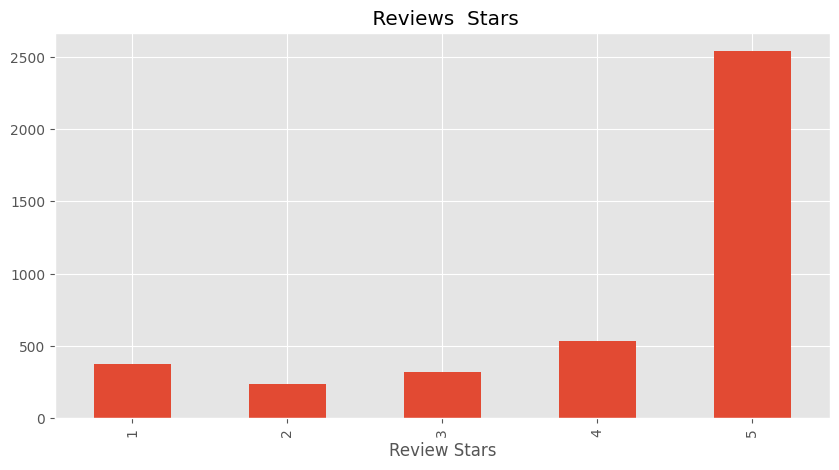

In [15]:
import matplotlib.pyplot as plt # Importing the matplotlib library for plotting
(df['Score']   # Accessing the 'Score' column from the DataFrame
 .value_counts() #Counting the frequency of each unique value in the 'Score' column
 .sort_index()
 .plot.bar(title=' Reviews  Stars',
           figsize=(10, 5),
           xlabel='Review Stars',
           ))
plt.show()

In [16]:
# retrieves and prints the example of the data  
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


# tokenize with  NLTK

In [17]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

#  VADER Seniment 

We will use NLTK  `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses  approach:
    1. Tokenization apply
    2. Stop words are removed
    3. each word is scored and combined to a total score.

 imports NLTK, downloads the VADER lexicon

In [18]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer # Import SentimentIntensityAnalyzer for sentiment analysis
  
nltk.download('vader_lexicon')  #Download the VADER lexicon
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\moham/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [50]:
sia.polarity_scores('The product looks good, but its performance is disappointing and far from what was promised')

{'neg': 0.2, 'neu': 0.558, 'pos': 0.242, 'compound': -0.0258}

In [19]:
#Importing tqdm for Progress Bar show
from tqdm.notebook import tqdm

 analyzes the sentiment of each text in a DataFrame 

In [20]:
from tqdm.autonotebook import tqdm    
# Iterating through each row in the DataFrame 'df' using iterrows() 
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

C:\Users\moham\AppData\Local\Temp\ipykernel_24840\1549429089.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/4000 [00:00<?, ?it/s]

In [15]:
pd.DataFrame(res)  # Converts the dictionary res into a DataFrame

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
neg,0.0000,0.1380,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,...,0.2480,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.046,0.0000,0.0000
neu,0.6950,0.8620,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,...,0.6360,0.6420,0.6610,1.0,0.8300,0.5020,0.6380,0.703,0.8000,0.7870
pos,0.3050,0.0000,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,...,0.1160,0.3580,0.3390,0.0,0.1700,0.4980,0.3620,0.251,0.2000,0.2130
compound,0.9441,-0.5664,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,...,-0.8174,0.8591,0.8481,0.0,0.8016,0.9677,0.9682,0.867,0.9885,0.7644


In [21]:
pd.DataFrame(res).T  #Reverse dataframe


,neg,neu,pos,compound
0,0.000,0.695,0.305,0.9441
1,0.138,0.862,0.000,-0.5664
2,0.091,0.754,0.155,0.8265
3,0.000,1.000,0.000,0.0000
4,0.000,0.552,0.448,0.9468
...,...,...,...,...
3995,0.000,0.677,0.323,0.8591
3996,0.000,0.786,0.214,0.9366
3997,0.080,0.728,0.192,0.8736
3998,0.000,0.699,0.301,0.8847


In [29]:
# Convert the 'res' dictionary into a DataFrame
results_df = pd.DataFrame.from_dict(res, orient='index')

# Add a new column 'Sentiment_Class' based on the 'compound' score
results_df['Sentiment_Class'] = results_df['compound'].apply(lambda x: 'Positive' if x > 0.05 
                                                             else ('Negative' if x < -0.05 
                                                                   else 'Neutral'))

# Display the first 10 rows of the DataFrame with the new 'Sentiment_Class' column
print(results_df.head(10))

     neg    neu    pos  compound Sentiment_Class
0  0.000  0.695  0.305    0.9441        Positive
1  0.138  0.862  0.000   -0.5664        Negative
2  0.091  0.754  0.155    0.8265        Positive
3  0.000  1.000  0.000    0.0000         Neutral
4  0.000  0.552  0.448    0.9468        Positive
5  0.029  0.809  0.163    0.8830        Positive
6  0.034  0.693  0.273    0.9346        Positive
7  0.000  0.520  0.480    0.9487        Positive
8  0.000  0.851  0.149    0.6369        Positive
9  0.000  0.705  0.295    0.8313        Positive


Marge the VADER  results with the Original Data

In [30]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [31]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,0,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,1,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,2,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,3,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,4,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive


## Plot VADER results

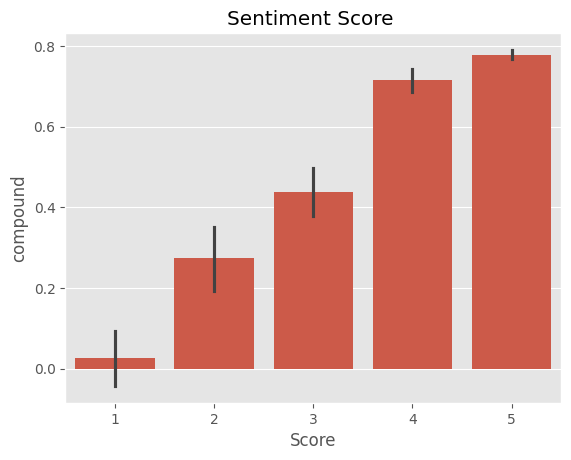

In [25]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Sentiment Score ')
plt.show()

In [41]:
! pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## -	Precision & Recall Evaluation

## vader Evaluation

In [36]:
# Reset the index and make it start from 0
results_df.reset_index(drop=True, inplace=True)

# Now, make sure the 'Id' starts from 1 by adding 1 to the index
results_df['Id'] = results_df.index 

# Extract the 'Id' and 'Sentiment_Class' columns
simplified_df = results_df[['Id', 'Sentiment_Class']]

# Display the first 10 rows of the simplified DataFrame
print(simplified_df.head(10))
print(simplified_df.tail(10))

   Id Sentiment_Class
0   0        Positive
1   1        Negative
2   2        Positive
3   3         Neutral
4   4        Positive
5   5        Positive
6   6        Positive
7   7        Positive
8   8        Positive
9   9        Positive
        Id Sentiment_Class
3990  3990        Positive
3991  3991        Positive
3992  3992        Positive
3993  3993        Positive
3994  3994        Negative
3995  3995        Positive
3996  3996        Positive
3997  3997        Positive
3998  3998        Positive
3999  3999        Positive


In [55]:
from collections import defaultdict

# Merge the DataFrames based on 'Id'
combined_df = simplified_df.merge(truee, on='Id')

# Define the possible classes (sentiment categories)
classes = ['Positive', 'Negative', 'Neutral']

# Initialize a dictionary to store metrics
metrics = defaultdict(dict)

for cls in classes:
    # True Positives: correctly predicted as 'cls'
    tp = ((combined_df['Sentiment_Class'] == cls) & (combined_df['Sentiment'] == cls)).sum()
    
    # False Positives: incorrectly predicted as 'cls'
    fp = ((combined_df['Sentiment_Class'] == cls) & (combined_df['Sentiment'] != cls)).sum()
    
    # False Negatives: samples that should have been 'cls' but were not predicted as such
    fn = ((combined_df['Sentiment_Class'] != cls) & (combined_df['Sentiment'] == cls)).sum()
    
    # Precision
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    # Recall
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    # F1 Score
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    metrics[cls]['Precision'] = precision
    metrics[cls]['Recall'] = recall
    metrics[cls]['F1 Score'] = f1_score

# Print metrics
for cls, vals in metrics.items():
    print(f"Class: {cls}")
    print(f"  Precision: {vals['Precision']:.4f}")
    print(f"  Recall: {vals['Recall']:.4f}")
    print(f"  F1 Score: {vals['F1 Score']:.4f}")
    print("-------------------")



Class: Positive
  Precision: 0.8390
  Recall: 0.9522
  F1 Score: 0.8920
-------------------
Class: Negative
  Precision: 0.5952
  Recall: 0.4119
  F1 Score: 0.4869
-------------------
Class: Neutral
  Precision: 0.1798
  Recall: 0.0505
  F1 Score: 0.0788
-------------------


#  Roberta Pretrained Model
 
 Use a model trained of a large corpus of data.


In [39]:
#Installing the Transformers Library in Python
! pip install transformers



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


 Importing Necessary Libraries for Sequence Classification

In [40]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Loading Pretrained Tokenizer and Model for Sentiment Analysis

In [41]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Running Sentiment Analysis with Roberta Model and Displaying Scores

In [42]:
# Tokenizing the input text
encoded_text = tokenizer(example, return_tensors='pt')  
print(f"Encoded Text: {encoded_text}")  

# Passing the tokenized text to the model
output = model(**encoded_text)
print(f"Model Output (Raw Scores): {output}")  

# Extracting the sentiment scores
scores = output[0][0].detach().numpy()
print(f"Raw Scores (before softmax): {scores}")    

# Applying the softmax function
scores = softmax(scores)
print(f"Scores after Softmax (Probabilities): {scores}")   

# Creating a dictionary to store the probabilities for each sentiment class
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(f"Scores Dictionary: {scores_dict}")      


Encoded Text: {'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}
Model Output (Raw Scores): SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
Raw Scores (before softmax): [ 3.1436293  -0.71066904 -2.6558964 ]
Scores after Softmax (Probabilities): [0.97635514 0.02068747 0.00295737]
Scores Dictionary: {'roberta_neg': np.float32(0.97635514), 'roberta_neu': np.float32(0.020687466), 'roberta_pos': np.float32(0.0029573706)}


In [43]:

print(scores_dict)

{'roberta_neg': np.float32(0.97635514), 'roberta_neu': np.float32(0.020687466), 'roberta_pos': np.float32(0.0029573706)}


# Applying Sentiment Analysis to All Texts in DataFrame 

In [44]:

def polarity_scores_roberta(text):
    try:
        encoded_text = tokenizer(text, return_tensors='pt', truncation=True, max_length=512) # Tokenizing the input
        output = model(**encoded_text) # Passing the tokenized text to the model
        scores = output[0][0].detach().numpy()
        scores = softmax(scores) # Applying the softmax function
        return {
            'roberta_neg': scores[0],
            'roberta_neu': scores[1],
            'roberta_pos': scores[2]
        }
    except Exception as e:
        print(f"Error processing text: {e}")
        return {
            'roberta_neg': 0,
            'roberta_neu': 0,
            'roberta_pos': 0
        }

# Apply  to the all texts
results = df['Text'].apply(lambda x: polarity_scores_roberta(x))

# Convert results to new columns
df = pd.concat([df, pd.DataFrame(results.tolist())], axis=1)

# show result 
print(df[['Text', 'roberta_neg', 'roberta_neu', 'roberta_pos']].head())

                                                Text  roberta_neg  \
0  I have bought several of the Vitality canned d...     0.009624   
1  Product arrived labeled as Jumbo Salted Peanut...     0.508986   
2  This is a confection that has been around a fe...     0.003229   
3  If you are looking for the secret ingredient i...     0.002295   
4  Great taffy at a great price.  There was a wid...     0.001635   

   roberta_neu  roberta_pos  
0     0.049980     0.940395  
1     0.452414     0.038600  
2     0.098067     0.898704  
3     0.090219     0.907486  
4     0.010302     0.988063  


# Assigning Sentiment Labels Based on the Highest Probability

In [50]:
# Create a new column 'Sentiment' based on the highest probability
df['Sentiment'] = df[['roberta_neg', 'roberta_neu', 'roberta_pos']].idxmax(axis=1)

# Map column names to sentiment labels
df['Sentiment'] = df['Sentiment'].replace({
    'roberta_neg': 'Negative',
    'roberta_neu': 'Neutral',
    'roberta_pos': 'Positive'
})

# Display only the ID and Sentiment columns
result11 = df[['Id', 'Sentiment']]
print(result11)

        Id Sentiment
0        0  Positive
1        1  Negative
2        2  Positive
3        3  Positive
4        4  Positive
...    ...       ...
3995  3995  Positive
3996  3996  Positive
3997  3997  Positive
3998  3998  Positive
3999  3999  Positive

[4000 rows x 2 columns]


# Performing Sentiment Analysis with VADER and Roberta Models  in DataFrame

In [46]:
res = {}  # Initialize an empty dictionary to store the results

# Iterate through each row in the DataFrame
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']    # Extract the text and ID from the current row
        myid = row['Id']
        vader_result = sia.polarity_scores(text)  # Analyze the sentiment of the text using VADER
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text) # Analyze the sentiment of the text using RoBERTa
        both = {**vader_result_rename, **roberta_result}  # Merge the VADER and RoBERTa results into one dictionary
        res[myid] = both  # Store the merged results in the dictionary 'res' with the ID as the key
    except Exception as e:  # If an error occurs during the process, print the error and continue
        print(f' for id {myid}: {e}, skipping...')
        continue


  0%|          | 0/4000 [00:00<?, ?it/s]

In [47]:
# convert to  DataFrame
result_df = pd.DataFrame(res).T

# show result
print(result_df.head(85))


    vader_neg  vader_neu  vader_pos  vader_compound  roberta_neg  roberta_neu  \
0       0.000      0.695      0.305          0.9441     0.009624     0.049980   
1       0.138      0.862      0.000         -0.5664     0.508986     0.452414   
2       0.091      0.754      0.155          0.8265     0.003229     0.098067   
3       0.000      1.000      0.000          0.0000     0.002295     0.090219   
4       0.000      0.552      0.448          0.9468     0.001635     0.010302   
..        ...        ...        ...             ...          ...          ...   
80      0.000      0.723      0.277          0.9098     0.001572     0.006270   
81      0.000      0.663      0.337          0.9041     0.002526     0.012215   
82      0.040      0.794      0.165          0.9957     0.241412     0.456240   
83      0.055      0.767      0.178          0.8642     0.102507     0.403605   
84      0.109      0.676      0.214          0.8431     0.121686     0.357951   

    roberta_pos  
0      0.

# Visualizing  RoBERTa Sentiment Distribution

C:\Users\moham\AppData\Local\Temp\ipykernel_24840\3340282461.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


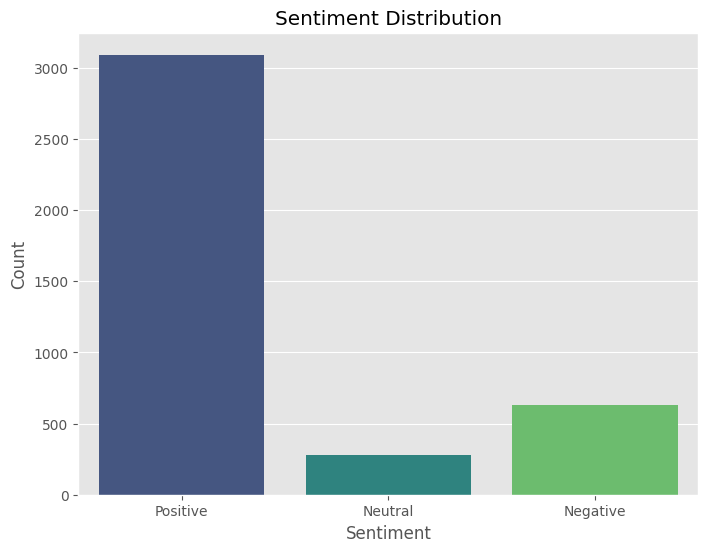

In [51]:


# Draw a count plot 
plt.figure(figsize=(8, 6))
sns.countplot(
    x='Sentiment', 
    data=result11,  #data
    order=['Positive', 'Neutral', 'Negative'],  
    palette='viridis'  #color
)

# title
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# show
plt.show()


# Evaluation RoBERTa 

In [52]:
from sklearn.metrics import classification_report  # Importing the classification_report function to calculate precision and recall

# 'result11' and 'truee' contain the predicted and actual sentiment labels
y_pred = result11['Sentiment']  # Predicted sentiment labels
y_true = truee['Sentiment']     # Actual sentiment labels

# Calculate Precision and Recall for each class (Positive, Neutral, Negative)
report = classification_report(y_true, y_pred, labels=['Positive', 'Neutral', 'Negative'])

# Display the report
print(report)

              precision    recall  f1-score   support

    Positive       0.93      0.94      0.93      3076
     Neutral       0.25      0.22      0.24       317
    Negative       0.73      0.75      0.74       607

    accuracy                           0.85      4000
   macro avg       0.64      0.64      0.64      4000
weighted avg       0.85      0.85      0.85      4000

